<h1><center>GROUP B</center></h1>

| STUDENT NAME | STUDENT CONTRIBUTION | PERCENTAGE OF CONTRIBUTION |
|:---:|:---:|:---:|
|| **EXPLORATORY DATA ANALYSIS** ||
| ANJU SUNNY CHUNGATH | Univariate Analysis | 50 |
| MOKSH NARESH JAISWAL | Bivariate Analysis | 50 |
|| **DATA PROCESSING AND FEATURE ENGG** ||
| ABDULLAH IFTEQAR MOHAMMED | Encoding Categorical Variable | 30 |
| WATAPOTHA KOSINNAGE CHALITHYA SANGEETH KUMARASINGHE | Scaling Numerical Variables | 30 |
| UTSAV HARSHADBHAI KHAMAR |Imputing Missing and Extreme Values | 30 |
| GOKUL KRISHNA POURNAMI GOPI |Train-Test split | 10 |
|| **MODELING AND CODE QUALITY** ||
| CLIFFORD ADDISON | Linear Regression | 25 |
| VAMSI KRISHNA MARADANI | Lasso | 25 |
| APARNA JAYAKUMAR RESMI | Ridge, Ridge Fine Tuning | 25 |
| SHAHNAZ PALAKUNNIL MOOSA | Decision Tree, Random Forest | 25 |

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<h2><center>EXPLORATORY DATA ANALYSIS<center><h2>

In [2]:
# Reading and viewing the raw data
df = pd.read_csv(r"/Downloads/archive/Fraud.csv")
df

,Id,LengthOfStay,ReadmissionCount,Gender,FacilityId,KidneyAilments,HeartAilments,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
0,13564856414,5,2.0,F,1338,NaN,NaN,False,NaN,32.7,152.0,64.0,2.0
1,13564856415,3,1.0,F,4964,NaN,NaN,True,NaN,31.1,165.0,105.0,1.0
2,13564856416,6,NaN,M,7593,NaN,NaN,False,NaN,32.4,111.0,53.0,NaN
3,13564856417,5,NaN,M,1739,NaN,NaN,False,NaN,31.2,175.0,44.0,3.0
4,13564856418,5,NaN,M,1703,NaN,NaN,False,Yes,31.9,114.0,93.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,13564867408,4,2.0,M,3019,NaN,NaN,False,Yes,27.6,107.0,83.0,2.0
10995,13564867409,2,NaN,F,9036,NaN,NaN,False,NaN,26.5,133.0,69.0,2.0
10996,13564867410,4,1.0,F,1486,NaN,NaN,False,Yes,28.5,177.0,108.0,2.0
10997,13564867411,3,3.0,F,2590,NaN,NaN,False,Yes,NaN,138.0,NaN,2.0


In [3]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     10999 non-null  int64  
 1   LengthOfStay           10999 non-null  int64  
 2   ReadmissionCount       5429 non-null   float64
 3   Gender                 10999 non-null  object 
 4   FacilityId             10999 non-null  int64  
 5   KidneyAilments         0 non-null      float64
 6   HeartAilments          0 non-null      float64
 7   PyschologicalAilments  10999 non-null  bool   
 8   SubstanceAbuseHistory  1527 non-null   object 
 9   BMI                    10997 non-null  float64
 10  ABG                    10999 non-null  float64
 11  Pulse                  10997 non-null  float64
 12  SecondaryDiagnosis     10760 non-null  float64
dtypes: bool(1), float64(7), int64(3), object(2)
memory usage: 1.0+ MB


In [4]:
# Getting the count of null values for all attributes
df.isna().sum()

Id                           0
LengthOfStay                 0
ReadmissionCount          5570
Gender                       0
FacilityId                   0
KidneyAilments           10999
HeartAilments            10999
PyschologicalAilments        0
SubstanceAbuseHistory     9472
BMI                          2
ABG                          0
Pulse                        2
SecondaryDiagnosis         239
dtype: int64

In [5]:
# Calculating the percentage of null values
percentage_of_null =  round(df.isna().sum()*100 / len(df), 2)
percentage_of_null

Id                         0.00
LengthOfStay               0.00
ReadmissionCount          50.64
Gender                     0.00
FacilityId                 0.00
KidneyAilments           100.00
HeartAilments            100.00
PyschologicalAilments      0.00
SubstanceAbuseHistory     86.12
BMI                        0.02
ABG                        0.00
Pulse                      0.02
SecondaryDiagnosis         2.17
dtype: float64

In [6]:
# Getting a Statistical Summary of the data
df.describe(include="all")

,Id,LengthOfStay,ReadmissionCount,Gender,FacilityId,KidneyAilments,HeartAilments,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
count,1.099900e+04,10999.000000,5429.000000,10999,10999.000000,0.0,0.0,10999,1527,10997.000000,10999.000000,10997.000000,10760.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NaN,NaN,NaN,False,Yes,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,6011,NaN,NaN,NaN,10396,1517,NaN,NaN,NaN,NaN
mean,1.356486e+10,4.554232,1.883036,NaN,5005.584235,NaN,NaN,NaN,NaN,29.059925,142.644591,77.751023,2.446933
std,3.175282e+03,3.302963,1.102079,NaN,2872.477964,NaN,NaN,NaN,NaN,2.006137,30.329310,18.135555,1.779553
min,1.356486e+10,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,19.800000,-1.010000,10.000000,0.000000
25%,1.356486e+10,2.000000,1.000000,NaN,2549.000000,NaN,NaN,NaN,NaN,27.700000,123.000000,65.000000,1.000000
50%,1.356486e+10,4.000000,2.000000,NaN,4994.000000,NaN,NaN,NaN,NaN,29.000000,143.000000,78.000000,2.000000
75%,1.356486e+10,6.000000,2.000000,NaN,7495.000000,NaN,NaN,NaN,NaN,30.400000,163.000000,90.000000,3.000000


In [7]:
df.columns

Index(['Id', 'LengthOfStay', 'ReadmissionCount', 'Gender', 'FacilityId',
       'KidneyAilments', 'HeartAilments', 'PyschologicalAilments',
       'SubstanceAbuseHistory', 'BMI', 'ABG', 'Pulse', 'SecondaryDiagnosis'],
      dtype='object')

In [8]:
# Defining the target and features
Y = df[['LengthOfStay']]
numeric_columns = ['ReadmissionCount','BMI', 'ABG', 'Pulse','SecondaryDiagnosis']
categorical_columns = ['Gender', 'FacilityId','PyschologicalAilments', 'SubstanceAbuseHistory']
columns_to_drop = ['Id','KidneyAilments','HeartAilments' ]

In [9]:
# Dropping the attributes with no data
df = df.drop(columns=columns_to_drop)

In [10]:
# Checking for the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LengthOfStay           10999 non-null  int64  
 1   ReadmissionCount       5429 non-null   float64
 2   Gender                 10999 non-null  object 
 3   FacilityId             10999 non-null  int64  
 4   PyschologicalAilments  10999 non-null  bool   
 5   SubstanceAbuseHistory  1527 non-null   object 
 6   BMI                    10997 non-null  float64
 7   ABG                    10999 non-null  float64
 8   Pulse                  10997 non-null  float64
 9   SecondaryDiagnosis     10760 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 784.2+ KB


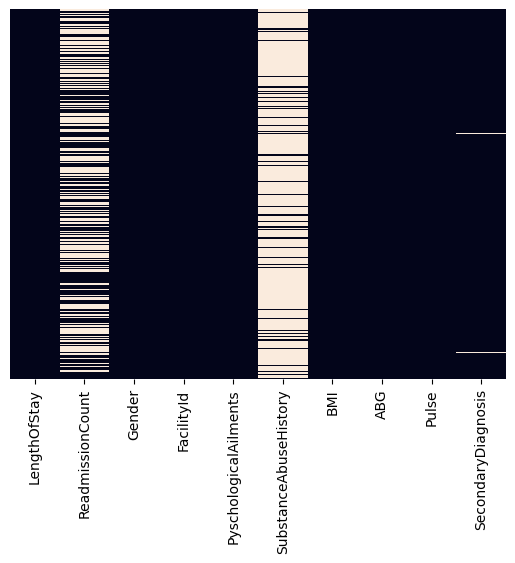

In [11]:
# Missing Data heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='rocket')
plt.show()

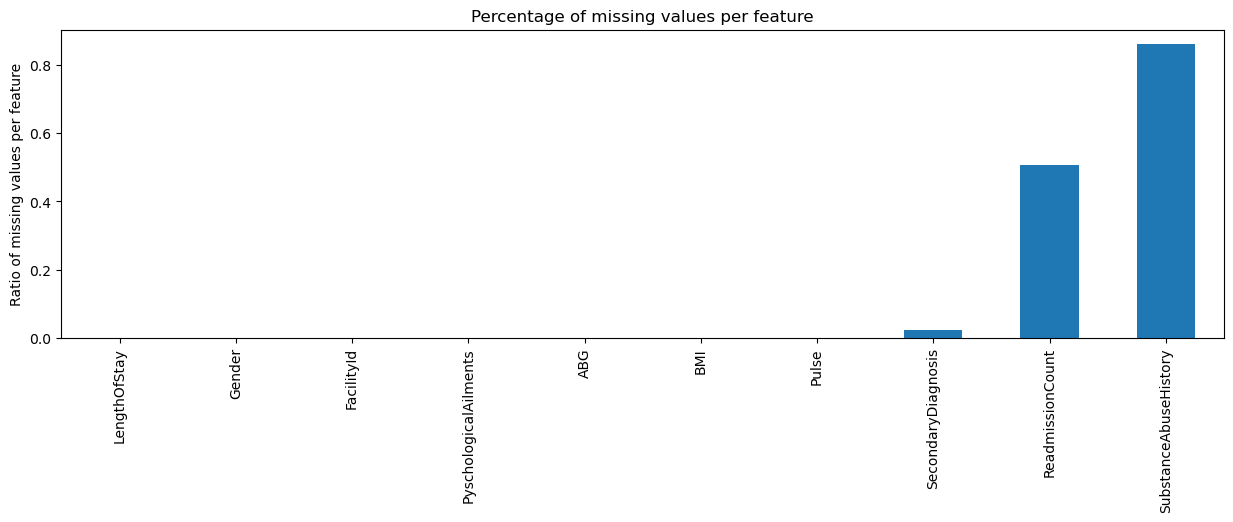

In [12]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

array([[<Axes: title={'center': 'LengthOfStay'}>,
        <Axes: title={'center': 'ReadmissionCount'}>,
        <Axes: title={'center': 'FacilityId'}>,
        <Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'ABG'}>],
       [<Axes: title={'center': 'Pulse'}>,
        <Axes: title={'center': 'SecondaryDiagnosis'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

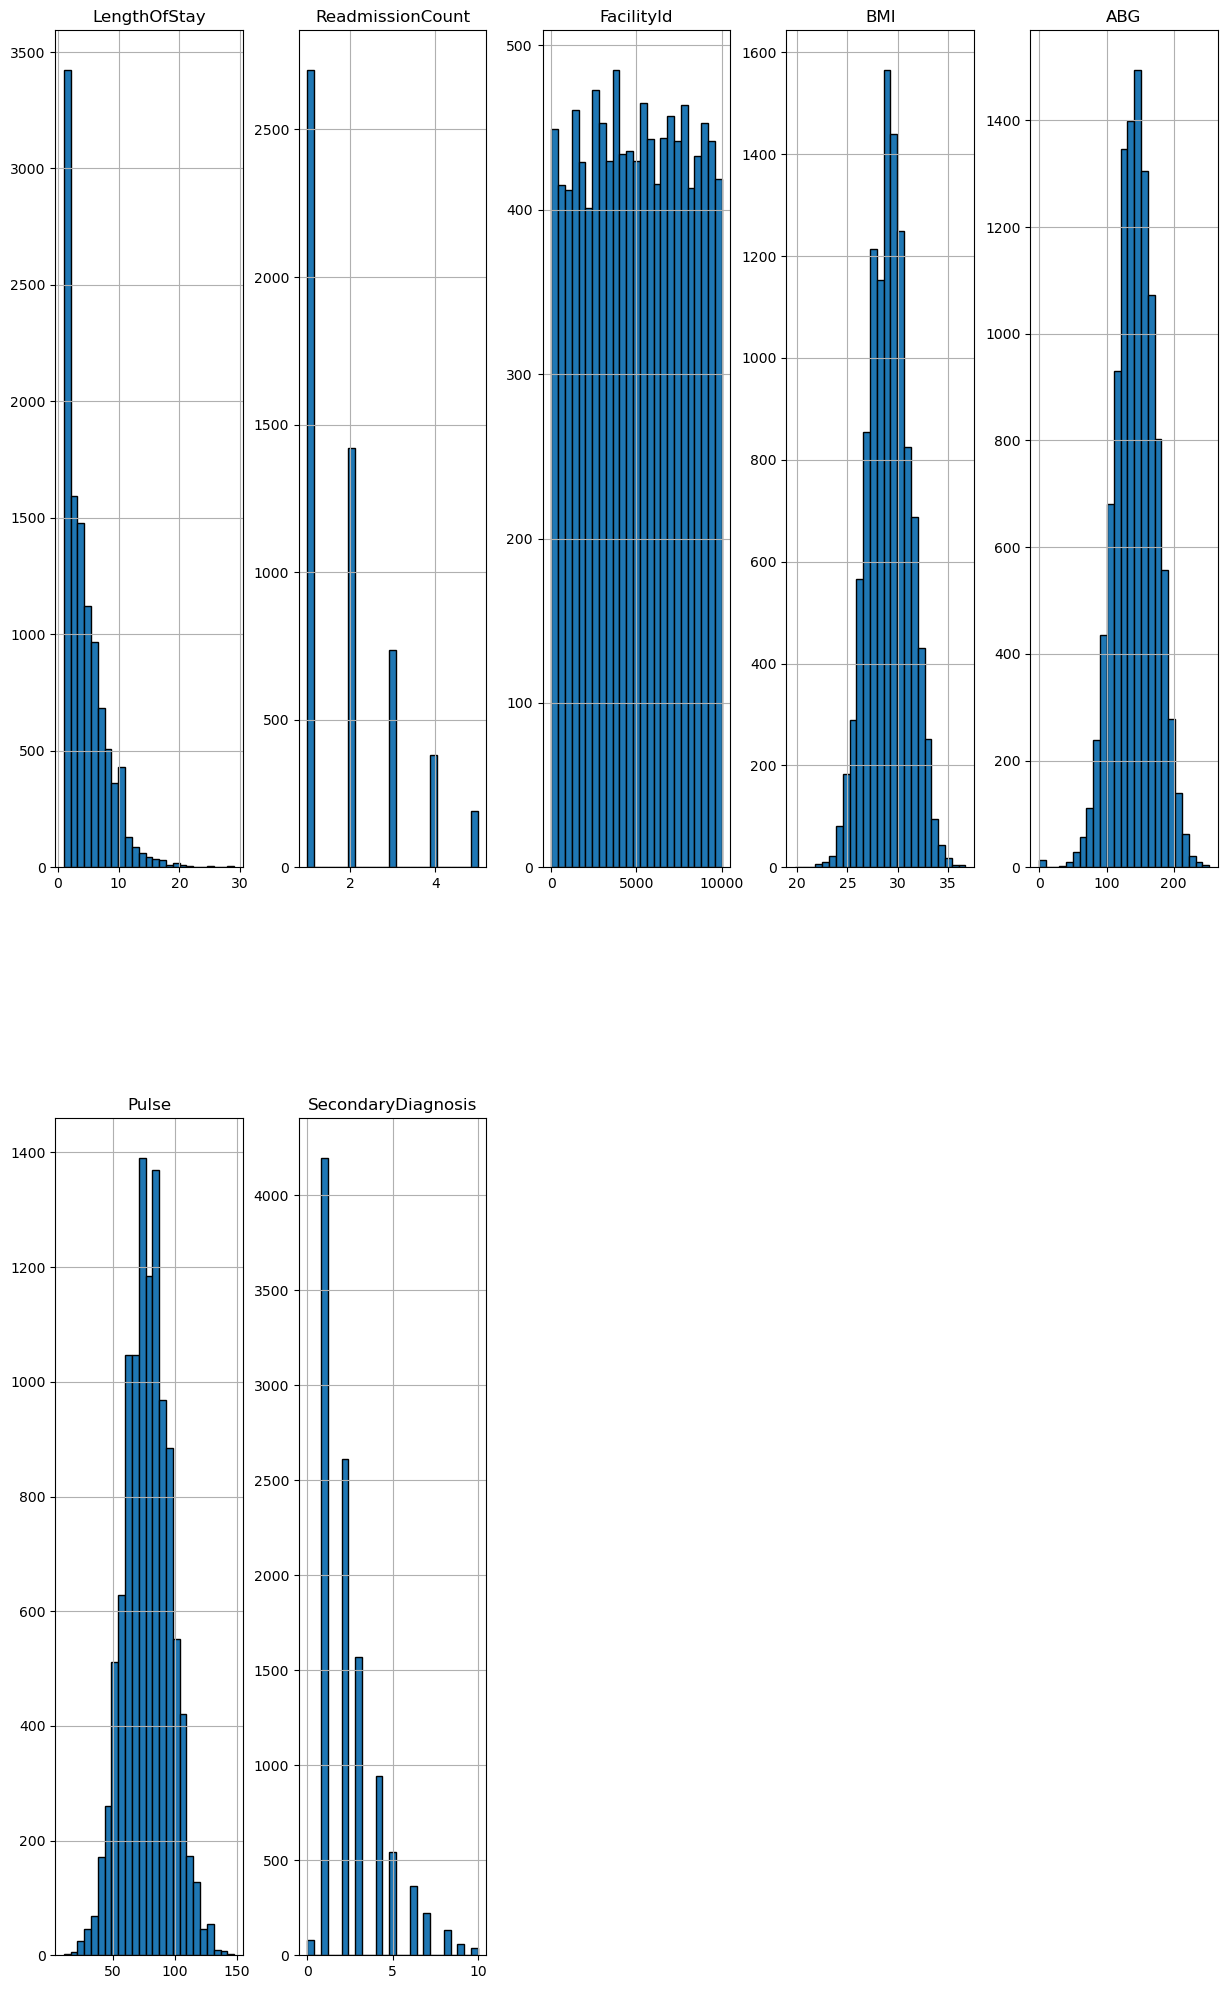

In [13]:
# Create histograms for numeric data
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")

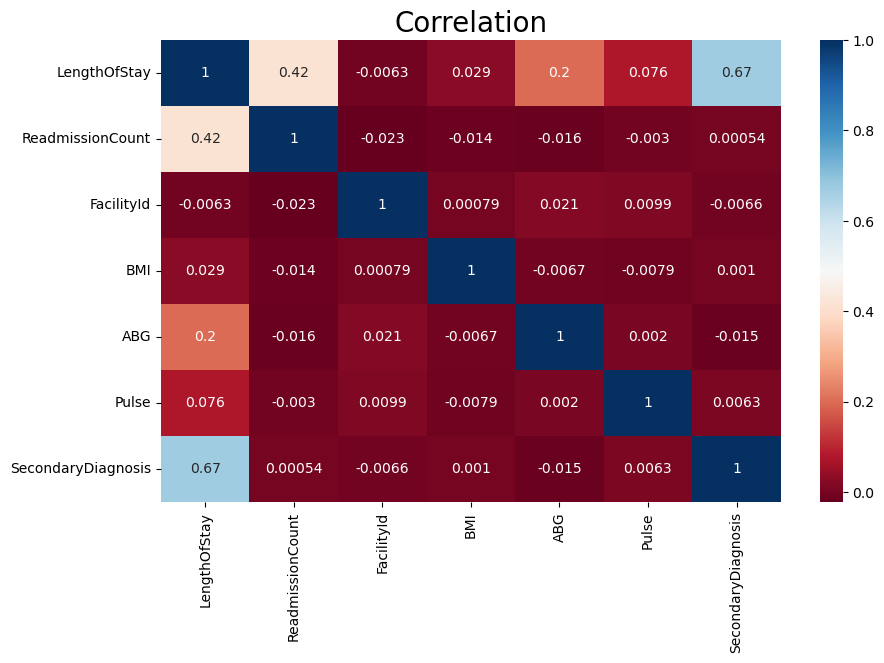

In [14]:
# Correlation plot
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='RdBu')

plt.title("Correlation",fontsize=20)
plt.show()

From above analysis we can assertain that
SecondaryDiagnosis has most impact on LengthOfStay, followed by ReadmissionCount, ABG, Pulse.

Analysis of Gender

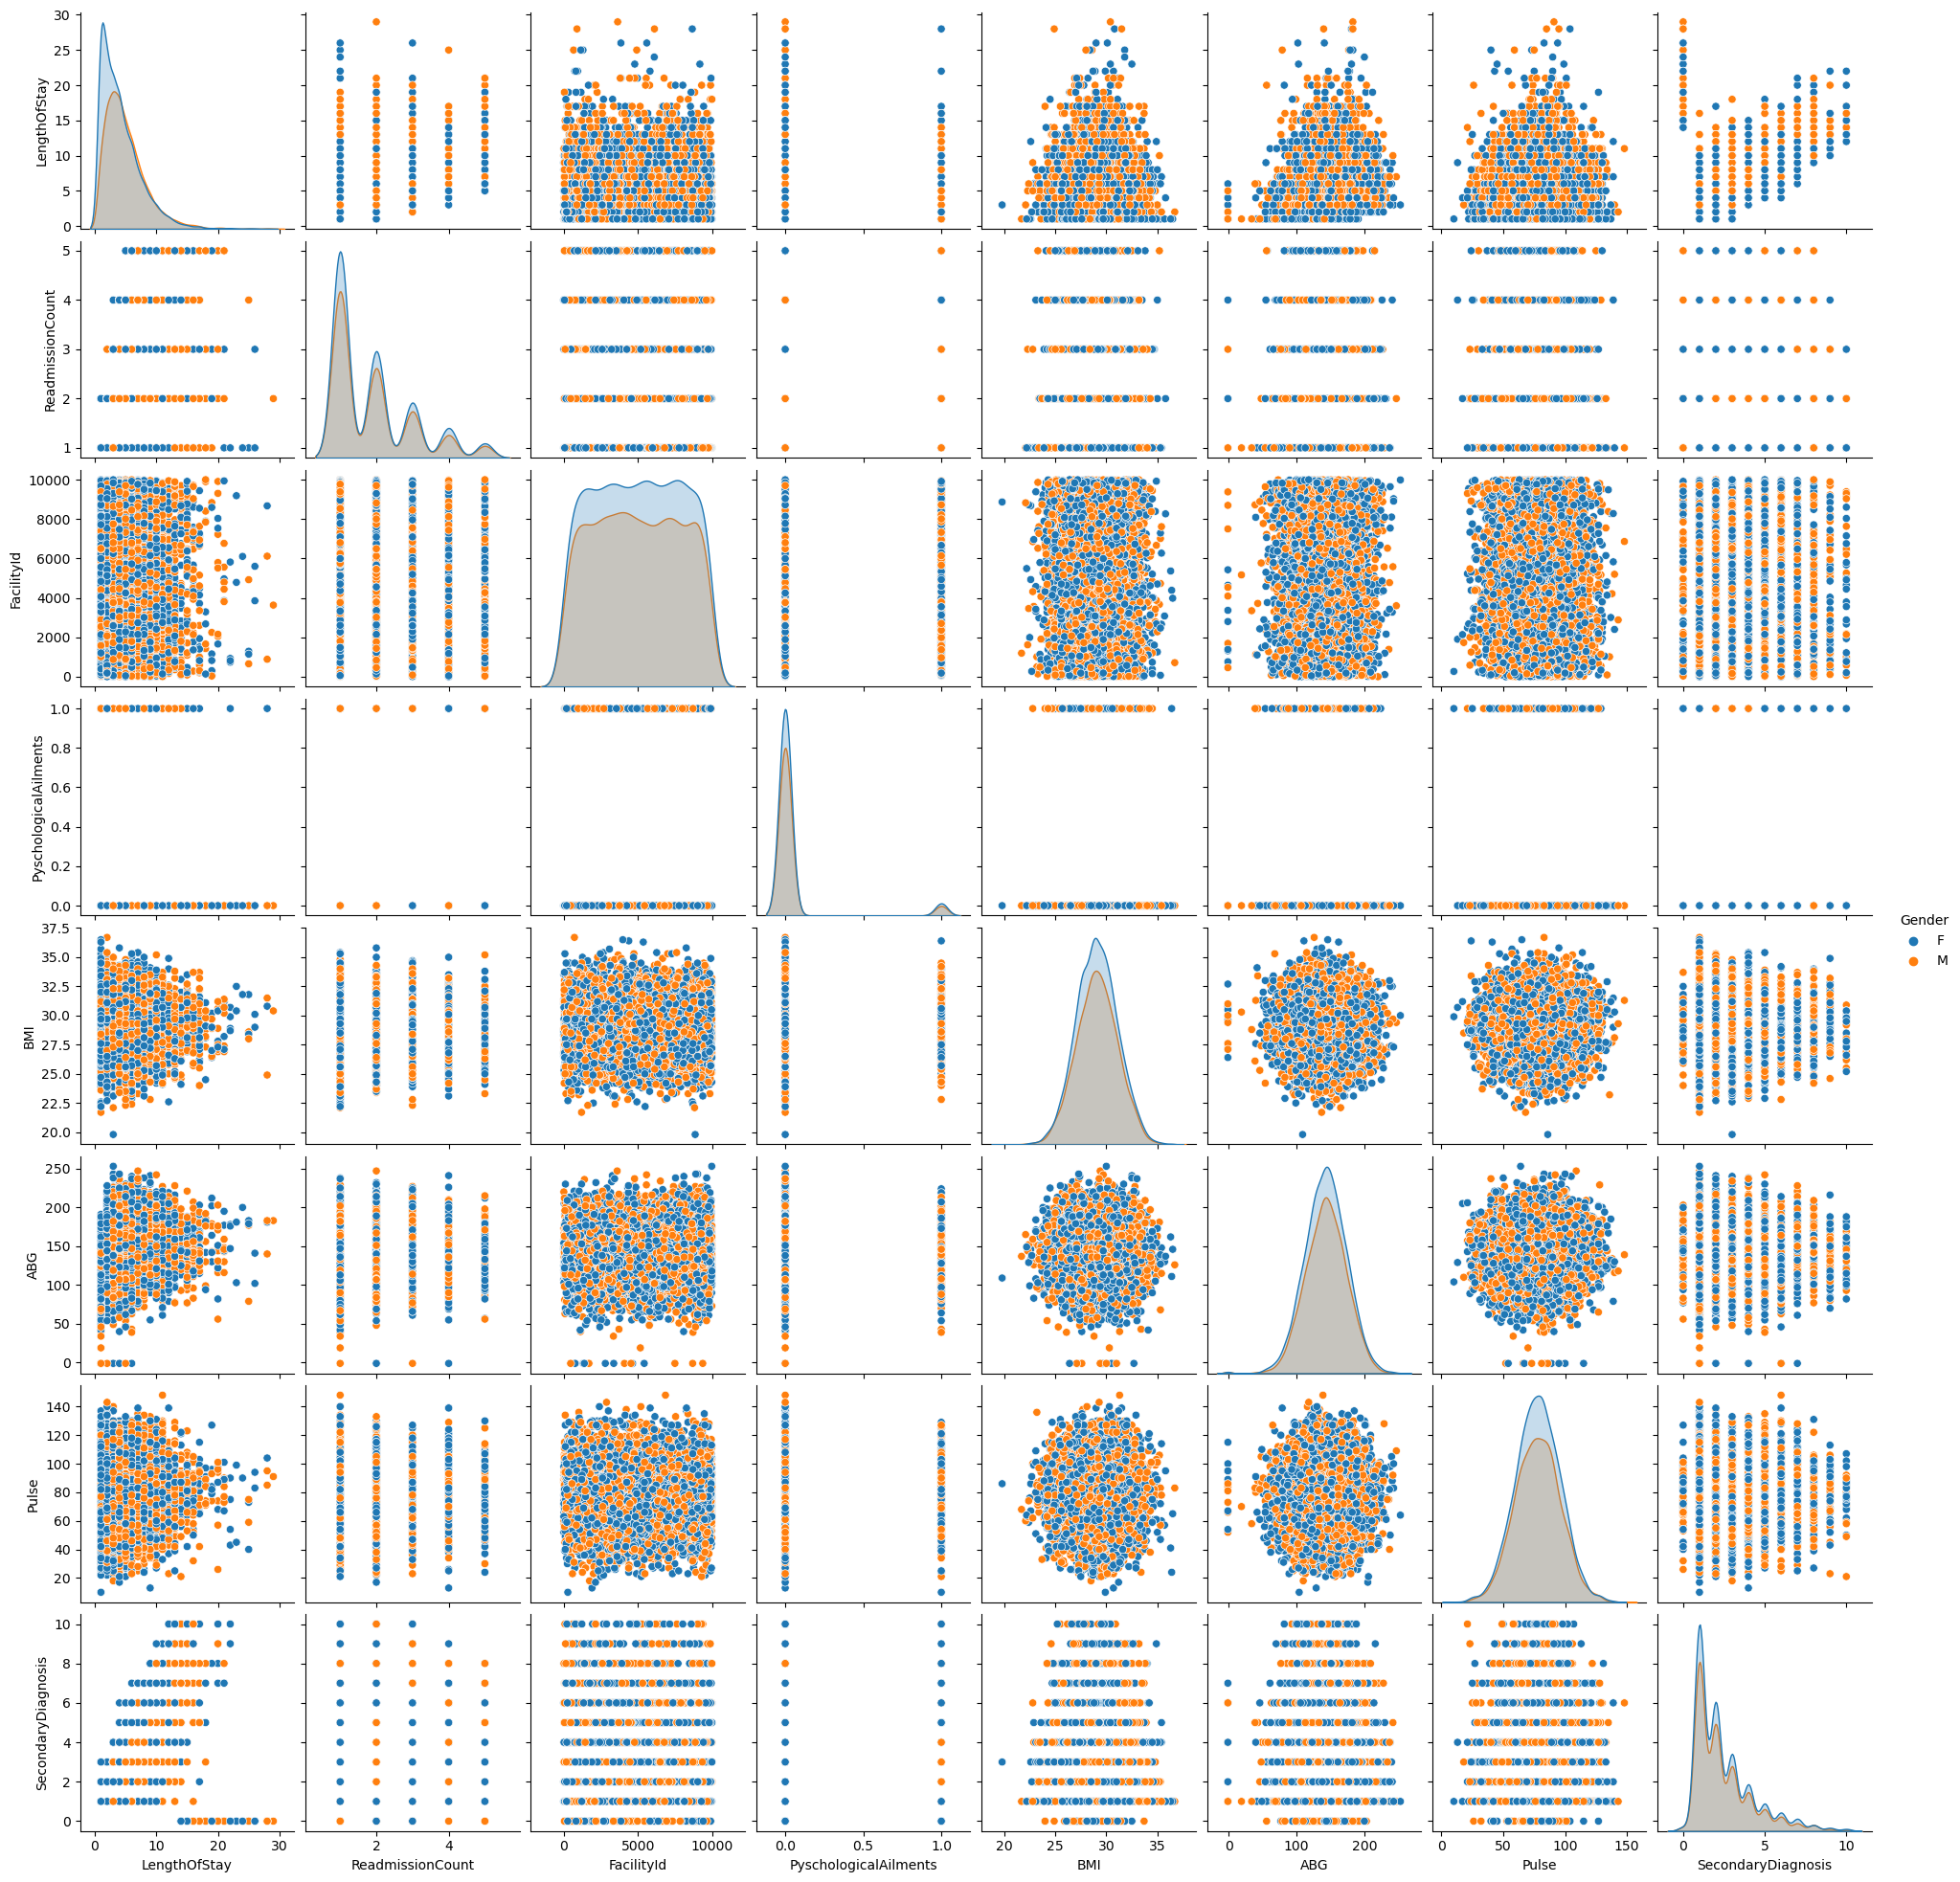

In [15]:
# Pairplot of the Gender against the rest of the attributes
sns.pairplot(df, hue='Gender')
plt.show()

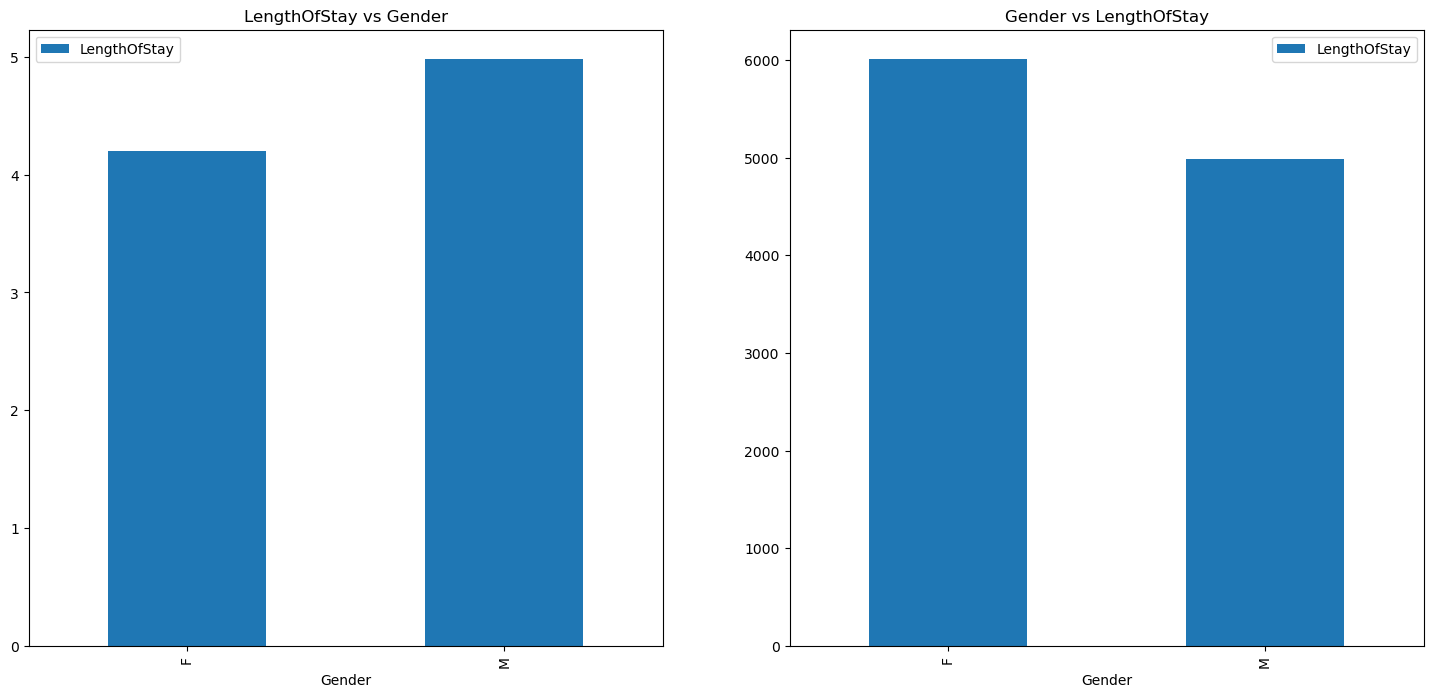

In [16]:
# Comparing the LengthOfStay and Gender
data = df[['Gender','LengthOfStay']]
f,ax=plt.subplots(1,2,figsize=(18,8))
data.groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('LengthOfStay vs Gender')
data.groupby(['Gender']).count().plot.bar(ax=ax[1])
ax[1].set_title('Gender vs LengthOfStay')
plt.show()

From above graph we can conclude that males stay longer than females on average

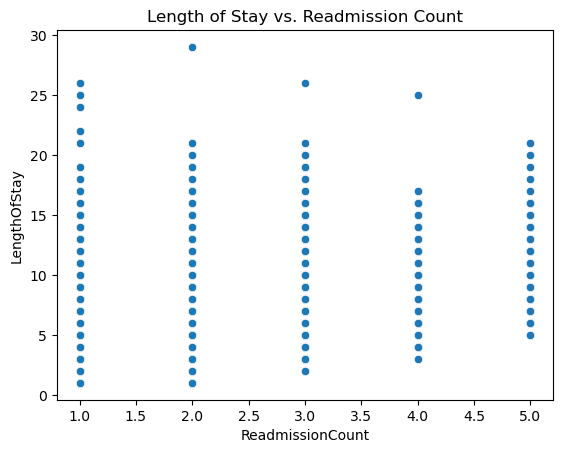

Pearson correlation: 0.41656392997241626


In [17]:
# Drop rows where either ReadmissionCount or LengthOfStay is missing
df_filtered = df.dropna(subset=['ReadmissionCount', 'LengthOfStay'])

# Scatter Plot
sns.scatterplot(x='ReadmissionCount', y='LengthOfStay', data=df)
plt.title('Length of Stay vs. Readmission Count')
plt.show()

# Pearson Correlation Coefficient
correlation,_ = scipy.stats.pearsonr(df_filtered['ReadmissionCount'], df_filtered['LengthOfStay'])
print(f'Pearson correlation: {correlation}')


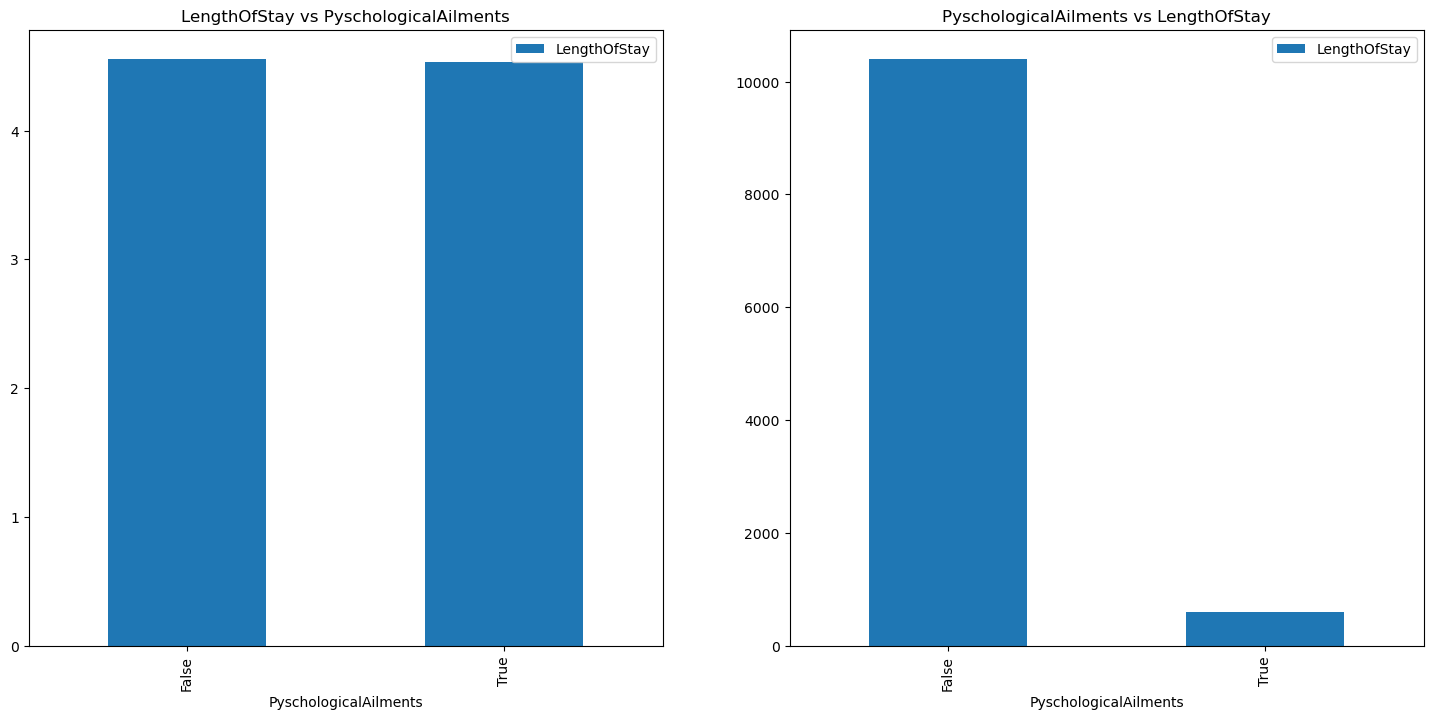

In [18]:
# Comparing the LengthOfStay and PyschologicalAilments
data = df[['PyschologicalAilments','LengthOfStay']]
f,ax=plt.subplots(1,2,figsize=(18,8))
data.groupby(['PyschologicalAilments']).mean().plot.bar(ax=ax[0])
ax[0].set_title('LengthOfStay vs PyschologicalAilments')
data.groupby(['PyschologicalAilments']).count().plot.bar(ax=ax[1])
ax[1].set_title('PyschologicalAilments vs LengthOfStay')
plt.show()

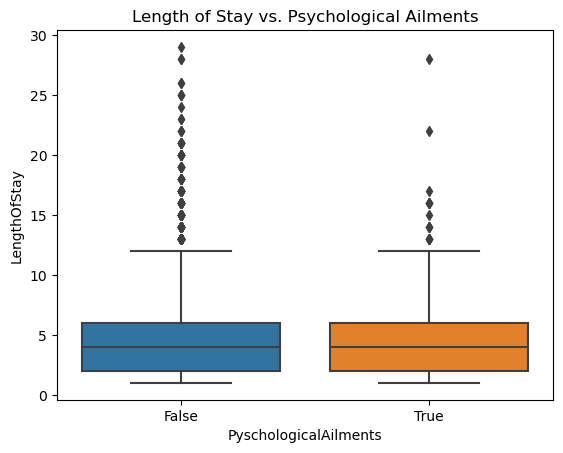

T-test: t_stat=0.1547367553750412, p_val=0.8770316920521881


In [19]:
from scipy.stats import ttest_ind

# Box Plot
sns.boxplot(x='PyschologicalAilments', y='LengthOfStay', data=df)
plt.title('Length of Stay vs. Psychological Ailments')
plt.show()

# T-test
no_ailments = df[df['PyschologicalAilments'] == False]['LengthOfStay']
ailments = df[df['PyschologicalAilments'] == True]['LengthOfStay']
t_stat, p_val = ttest_ind(no_ailments, ailments, nan_policy='omit')
print(f'T-test: t_stat={t_stat}, p_val={p_val}')

1. The t-statistic of 0.155 is very small. It means the difference between the group means is only about 0.155 standard errors away from zero.
2. The p-value of 0.877 is much higher than the commonly used significance level of 0.05. This means there's an 87.7% probability of observing a t-statistic as extreme as this (or more extreme) purely by chance.

#### Conclusion:
Thus, based on these results, we strongly fail to reject the null hypothesis. This means we have very little evidence to conclude that there's a meaningful difference between the two groups being compared. The observed difference is almost certainly due to random sampling variability.


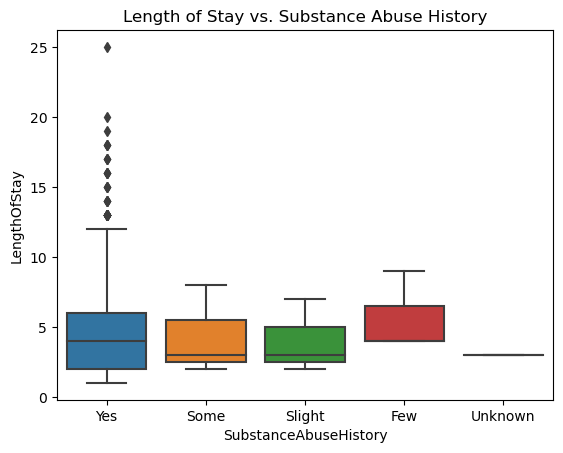

T-test: t_stat=0.9877861566778599, p_val=0.32327912118981716


In [20]:
# Box Plot of LengthOfStay and SubstanceAbuseHistory
sns.boxplot(x='SubstanceAbuseHistory', y='LengthOfStay', data=df)
plt.title('Length of Stay vs. Substance Abuse History')
plt.show()

# T-test of LengthOfStay and SubstanceAbuseHistory
no_history = df[df['SubstanceAbuseHistory'].isnull()]['LengthOfStay']
history = df[df['SubstanceAbuseHistory'].notnull()]['LengthOfStay']
t_stat, p_val = ttest_ind(no_history, history, nan_policy='omit')
print(f'T-test: t_stat={t_stat}, p_val={p_val}')


1. The t-statistic of 0.988 is significantly small. It means the difference between the group means is only about 0.988 standard errors away from zero.
2. The p-value of 0.32 suggests that there's a 32.3% probability of observing a t-statistic as extreme as this (or higher) purely by chance.

#### Conclusion:
Thus, based on these results, we fail to reject the null hypothesis. This means we don't have enough evidence to conclude that there's a meaningful difference between the two groups being compared

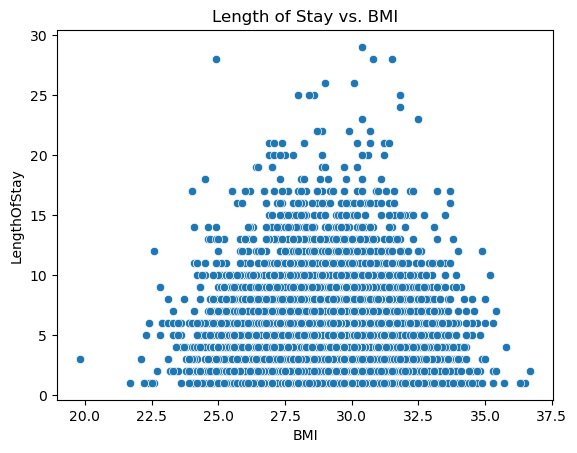

Pearson correlation: 0.029058146123292876


In [21]:
# Drop rows where either BMI or LengthOfStay is missing
data_filtered = df.dropna(subset=['BMI', 'LengthOfStay'])

# Scatter Plot
sns.scatterplot(x='BMI', y='LengthOfStay', data=data_filtered)
plt.title('Length of Stay vs. BMI')
plt.show()

# Pearson Correlation Coefficient
correlation, _ = scipy.stats.pearsonr(data_filtered['BMI'], data_filtered['LengthOfStay'])
print(f'Pearson correlation: {correlation}')


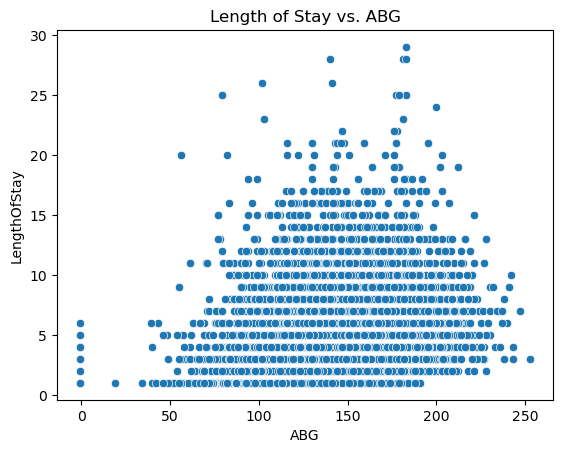

Pearson correlation: 0.1976131945898191


In [22]:
# Drop rows where either ABG or LengthOfStay is missing
data_filtered_1 = df.dropna(subset=['ABG', 'LengthOfStay'])

# Scatter Plot
sns.scatterplot(x='ABG', y='LengthOfStay', data=data_filtered_1)
plt.title('Length of Stay vs. ABG')
plt.show()

# Pearson Correlation Coefficient
correlation, _ = scipy.stats.pearsonr(data_filtered_1['ABG'], data_filtered_1['LengthOfStay'])
print(f'Pearson correlation: {correlation}')


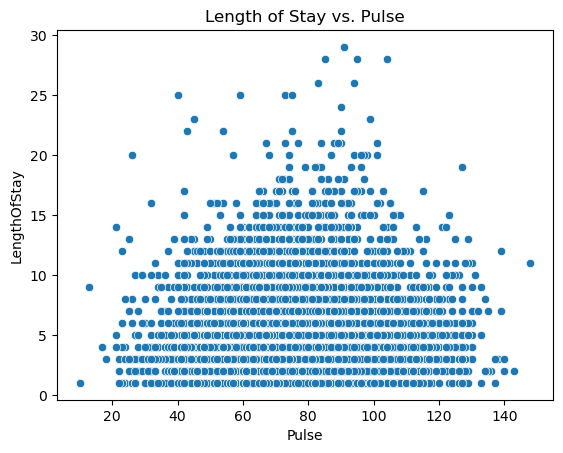

Pearson correlation: 0.07583093469552127


In [23]:
# Drop rows where either Pulse or LengthOfStay is missing
data_filtered_2 = df.dropna(subset=['Pulse', 'LengthOfStay'])

# Scatter Plot
sns.scatterplot(x='Pulse', y='LengthOfStay', data=data_filtered_2)
plt.title('Length of Stay vs. Pulse')
plt.show()

# Pearson Correlation Coefficient
correlation, _ = scipy.stats.pearsonr(data_filtered_2['Pulse'], data_filtered_2['LengthOfStay'])
print(f'Pearson correlation: {correlation}')

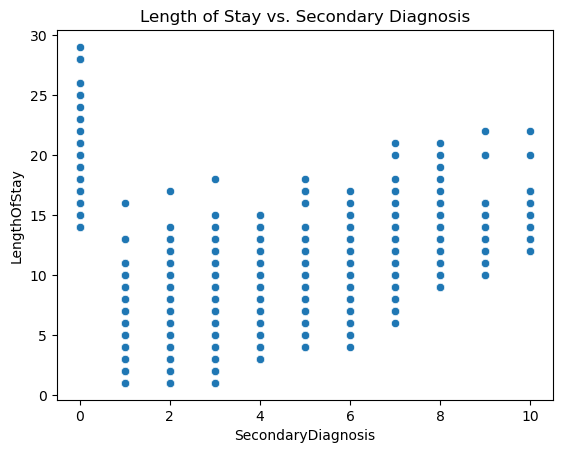

Pearson correlation: 0.6699297963040698


In [24]:
# Drop rows where either SecondaryDiagnosis or LengthOfStay is missing
data_filtered_3 = df.dropna(subset=['SecondaryDiagnosis', 'LengthOfStay'])

# Scatter Plot
sns.scatterplot(x='SecondaryDiagnosis', y='LengthOfStay', data=data_filtered_3)
plt.title('Length of Stay vs. Secondary Diagnosis')
plt.show()

# Pearson Correlation Coefficient
correlation, _ = scipy.stats.pearsonr(data_filtered_3['SecondaryDiagnosis'], data_filtered_3['LengthOfStay'])
print(f'Pearson correlation: {correlation}')

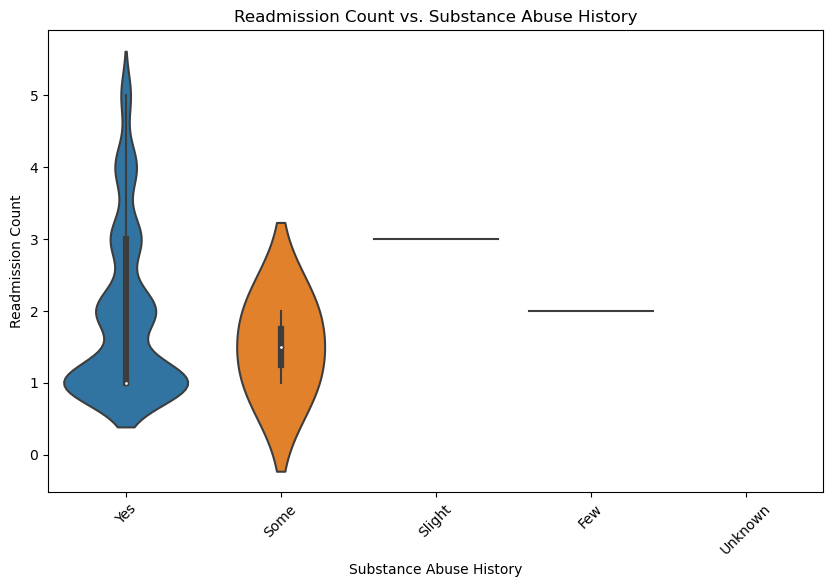

In [25]:
# Violin Plot of SubstanceAbuseHistory and ReadmissionCount
plt.figure(figsize=(10, 6))
sns.violinplot(x='SubstanceAbuseHistory', y='ReadmissionCount', data=df)
plt.title('Readmission Count vs. Substance Abuse History')
plt.xlabel('Substance Abuse History')
plt.ylabel('Readmission Count')
plt.xticks(rotation=45)
plt.show()


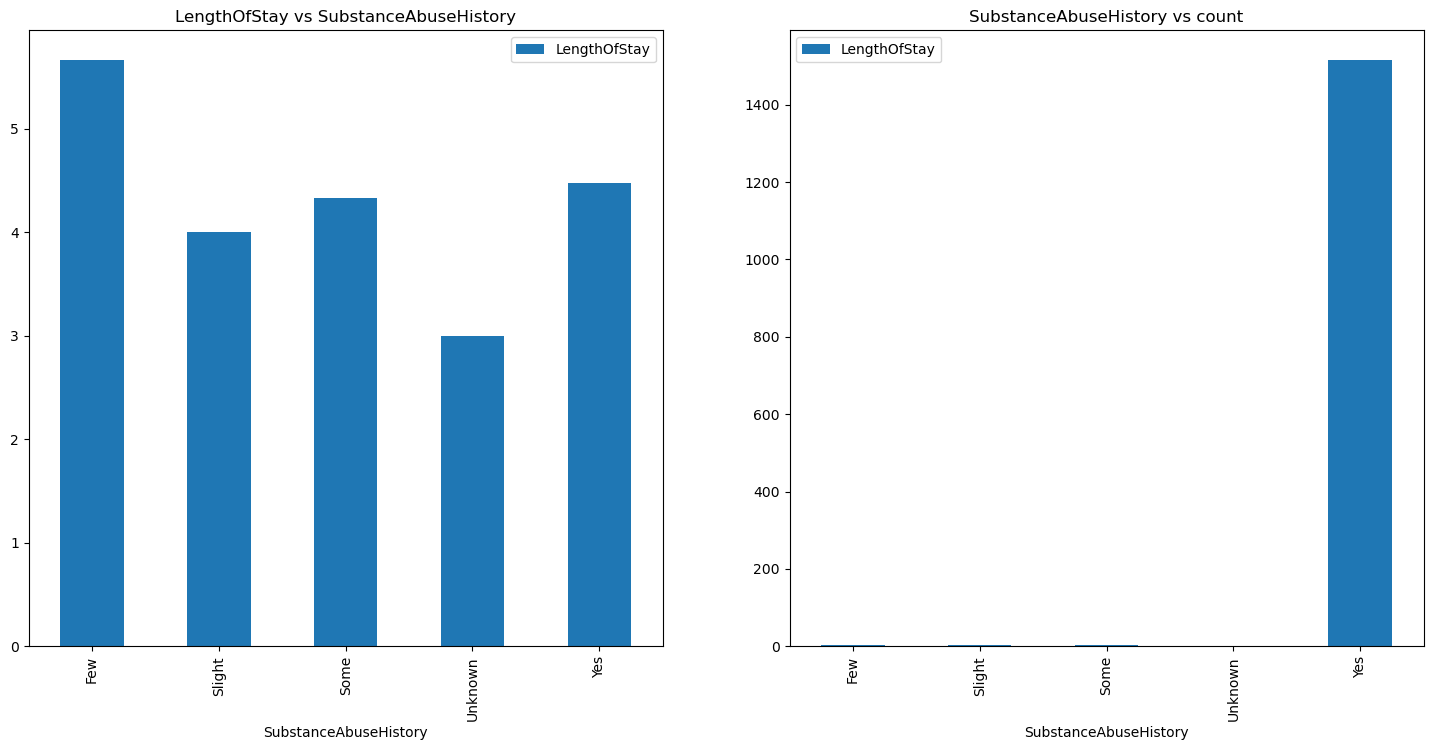

In [26]:
# Comparing LengthOfStay to SubstanceAbuseHistory (can checking the count)
data = df.dropna(subset=['SubstanceAbuseHistory', 'LengthOfStay'])[['SubstanceAbuseHistory','LengthOfStay']]
f,ax=plt.subplots(1,2,figsize=(18,8))
data.groupby(['SubstanceAbuseHistory']).mean().plot.bar(ax=ax[0])
ax[0].set_title('LengthOfStay vs SubstanceAbuseHistory')
data.groupby(['SubstanceAbuseHistory']).count().plot.bar(ax=ax[1])
ax[1].set_title('SubstanceAbuseHistory vs count')
plt.show()

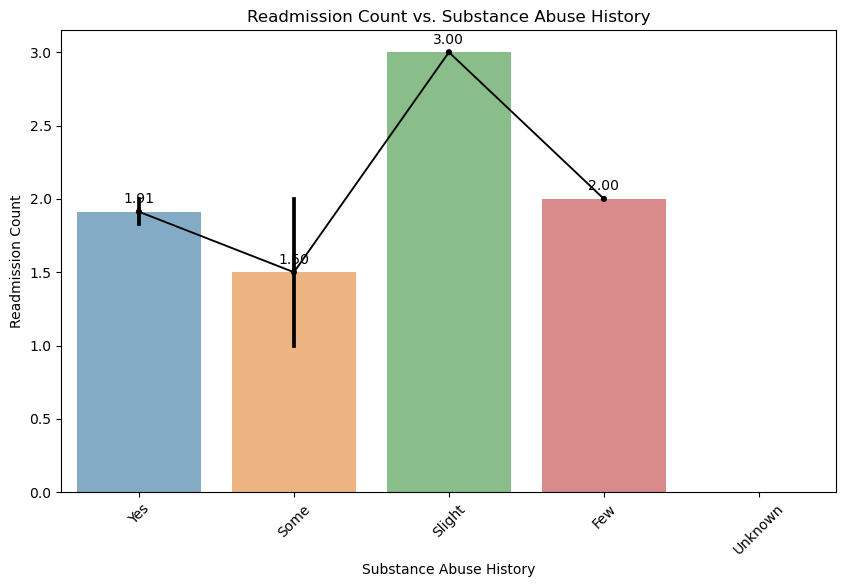

In [27]:
# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='SubstanceAbuseHistory', y='ReadmissionCount', data=df, ci=None, alpha=0.6)

# Overlay the point plot
point_plot = sns.pointplot(x='SubstanceAbuseHistory', y='ReadmissionCount', data=df, color='black', scale=0.5)

# Add labels on the bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Readmission Count vs. Substance Abuse History')
plt.xlabel('Substance Abuse History')
plt.ylabel('Readmission Count')
plt.xticks(rotation=45)
plt.show()

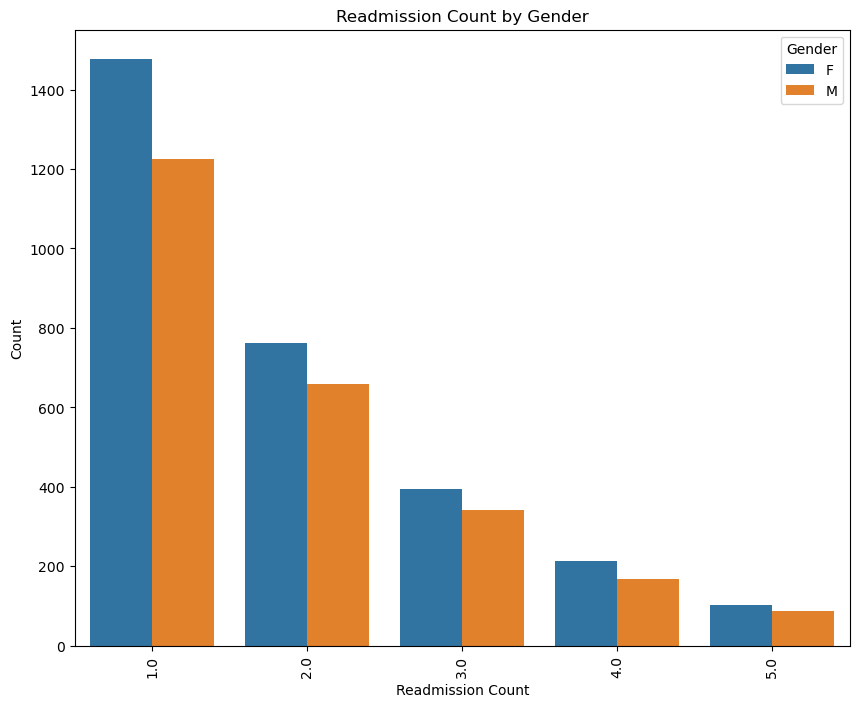

In [28]:
# Count plot: ReadmissionCount by Gender
plt.figure(figsize=(10, 8))
sns.countplot(x='ReadmissionCount', hue='Gender', data=df)
plt.title('Readmission Count by Gender')
plt.xlabel('Readmission Count')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

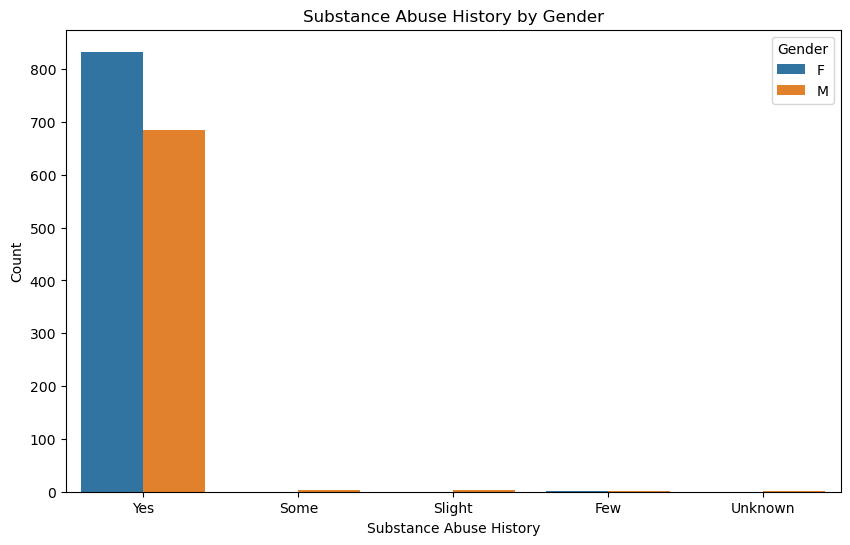

In [29]:
# Count plot: SubstanceAbuseHistory by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='SubstanceAbuseHistory', hue='Gender', data=df)
plt.title('Substance Abuse History by Gender')
plt.xlabel('Substance Abuse History')
plt.ylabel('Count')
plt.show()


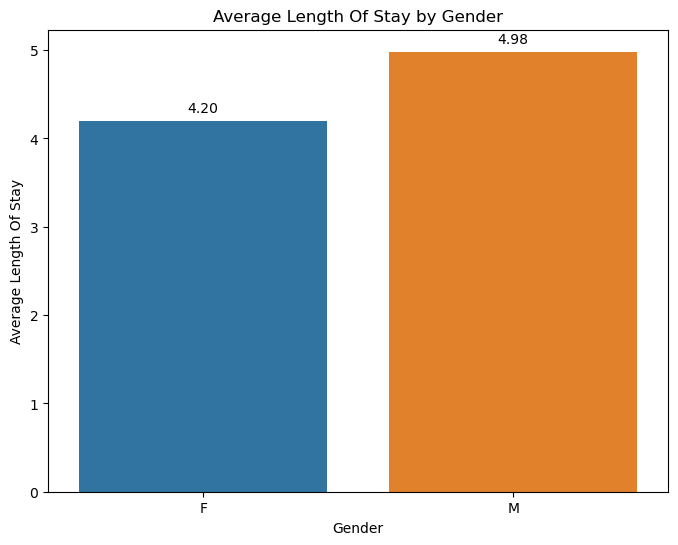

In [30]:
# Bar chart: Average LengthOfStay by Gender
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='LengthOfStay', data=df, ci=None)

# Add labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Average Length Of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Length Of Stay')
plt.show()

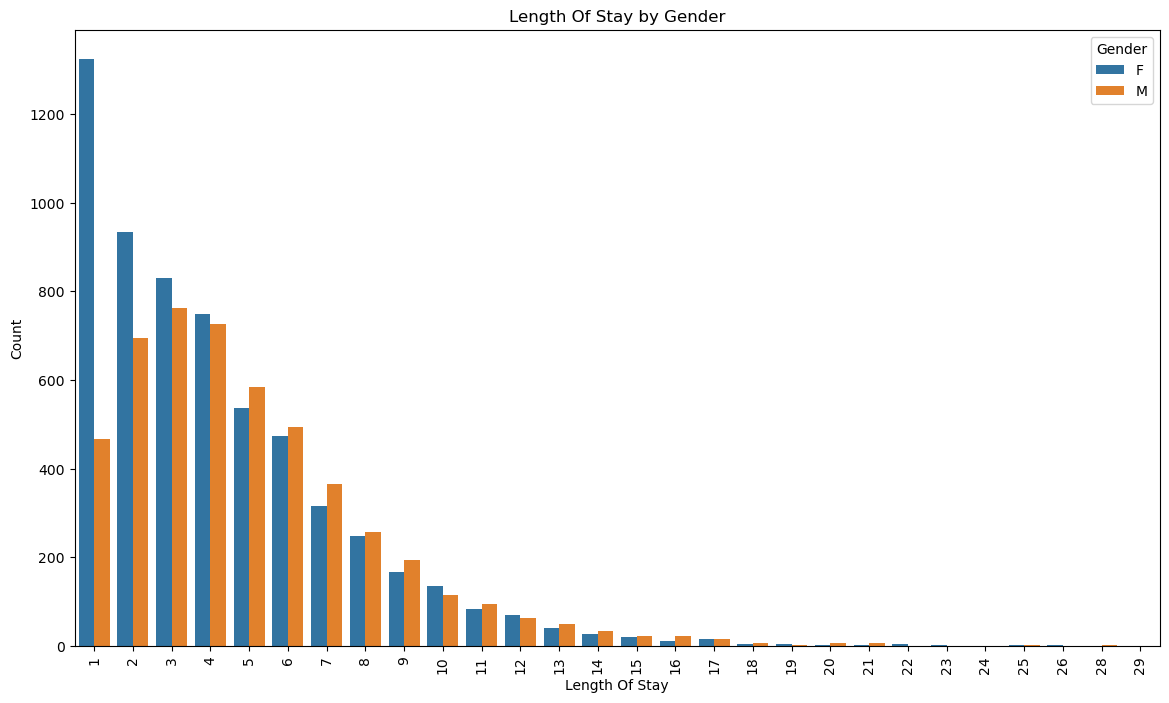

In [31]:
# Count plot: LengthOfStay by Gender
plt.figure(figsize=(14, 8))
sns.countplot(x='LengthOfStay', hue='Gender', data=df)
plt.title('Length Of Stay by Gender')
plt.xlabel('Length Of Stay')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


From above analysis we can conclude that

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LengthOfStay           10999 non-null  int64  
 1   ReadmissionCount       5429 non-null   float64
 2   Gender                 10999 non-null  object 
 3   FacilityId             10999 non-null  int64  
 4   PyschologicalAilments  10999 non-null  bool   
 5   SubstanceAbuseHistory  1527 non-null   object 
 6   BMI                    10997 non-null  float64
 7   ABG                    10999 non-null  float64
 8   Pulse                  10997 non-null  float64
 9   SecondaryDiagnosis     10760 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 784.2+ KB


From above EDA we can see that 4 features such as
BMI, ABG, Pulse and PyschologicalAilments
do not significantly effect our targetVariable.
We can drop these columns during optimization

### Exploratory Data Analysis
 
**Univariate Analysis**
1. The dataset comprises 10,999 rows of patient data and 13 columns, with LengthOfStay as the predictor variable. Initially, we reviewed all the features and their associated data types.
2. Next, we checked the data for missing values. The 'SubstanceAbuseHistory' variable has 86% missing values, followed by 'ReadmissionCount' with 50% missing values.
3. The KidneyAilments and HeartAilments variables contain no data, so we dropped these variables.
4. We analyzed the distribution of numeric variables using histograms. Variables such as BMI, ABG, and Pulse exhibit bell-shaped distributions.
5. The Length of stay values ranges from 1 to 29 days. The distribution is very skewed as most of the patients are having length of stay between 1 to 5 days.
6. To eliminate the impact for the variation of measurements of units of distinct attributes, the dataset can be normalized using the MinMax Scalar technique.
7. Categorical columns can be encoded using the 'one-hot encoding' approach, that quickly turns qualitative data into numerical.
 
 
**Bivariate Analysis**
1. Females have more 'ReadmissionCount' than Males. Their difference decreases as the number of days for 'ReadmissionCount' reaches its maximum value.
2. Males tend to stay for a greater number of days than females. As the 'LengthOfStay' increases (after 4 days), the number of females that was initially greater than males decreases while the number of males increases.
3. Average 'LengthOfStay' for males is 4.98 while for females is 4.20.
4. Most number of people falls under 'Yes' Category in terms of 'SubstanceAbuseHistory'.
5. People having Slight 'SubstanceAbuseHistory' have the most average 'ReadmissionCount' followed by people with Few 'SubstanceAbuseHistory'.
6. The target variable 'LengthOfStay' has a moderate positive correlation with 'SecondaryDiagnosis' followed by 'ReadmissionCount'. It has very week positive correlations with 'ABG', 'BMI' and 'Pulse'. Meanwhile, there is a very week negative correlation with 'FacilityID'.
7. When it comes to the impact of categorical features i.e. 'SubstanceAbuseHistory' and 'PyschologicalAilments' on our target variable, the T-statistic and the P-value suggest that we have very little evidence to conclude that there's a meaningful difference between the two groups being compared.

<h2><center>DATA PROCESSING AND FEATURE ENGG<center><h2>

In [33]:
# Displaying the categorical columns
categorical_columns

['Gender', 'FacilityId', 'PyschologicalAilments', 'SubstanceAbuseHistory']

In [34]:
# Displaying the numeric columns
numeric_columns

['ReadmissionCount', 'BMI', 'ABG', 'Pulse', 'SecondaryDiagnosis']

In [35]:
# Assigning the features to X
X = df[numeric_columns+categorical_columns]

In [36]:
Y.shape

(10999, 1)

Train Test Split

Train, Validation, Test = 60%, 20%, 20%

In [37]:
# Splitting the Test and Train values of X and Y
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=110)

#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1) # 0.2 x 0.8 = 0.2

In [38]:
# Checking the uniques values in the features
X_train.nunique(axis=0)

ReadmissionCount            5
BMI                       138
ABG                       196
Pulse                     123
SecondaryDiagnosis         11
Gender                      2
FacilityId               5813
PyschologicalAilments       2
SubstanceAbuseHistory       5
dtype: int64

In [39]:
for column in categorical_columns:
  print(f"column {column} has values: {set(X_train[column])}")

column Gender has values: {'M', 'F'}
column FacilityId has values: {2, 3, 4, 9, 12, 13, 14, 15, 16, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 52, 55, 57, 58, 60, 62, 63, 66, 68, 69, 71, 72, 73, 75, 78, 80, 81, 83, 84, 86, 88, 89, 90, 91, 93, 95, 97, 98, 99, 100, 102, 105, 106, 107, 108, 109, 113, 115, 116, 118, 121, 126, 128, 130, 131, 132, 133, 136, 137, 140, 141, 142, 143, 144, 145, 146, 147, 148, 153, 155, 156, 157, 158, 161, 163, 167, 169, 171, 173, 175, 177, 178, 179, 181, 186, 187, 188, 190, 193, 194, 198, 200, 205, 206, 208, 209, 211, 212, 215, 216, 217, 220, 221, 222, 224, 225, 226, 227, 229, 231, 232, 234, 235, 241, 242, 243, 244, 245, 246, 248, 251, 252, 253, 259, 262, 263, 264, 265, 267, 268, 269, 271, 273, 275, 276, 279, 284, 285, 289, 290, 291, 292, 293, 294, 296, 297, 298, 299, 300, 301, 303, 305, 307, 308, 310, 311, 312, 315, 319, 323, 325, 326, 328, 330, 333, 334, 335, 340, 341, 342, 343, 344, 348, 349, 350, 351, 353, 35

Columns to impute:
ReadmissionCount, SubstanceAbuseHistory, BMI, Pulse,SecondaryDiagnosis     

In [40]:
columns_to_impute = ['ReadmissionCount', 'SubstanceAbuseHistory', 'BMI', 'Pulse','SecondaryDiagnosis' ]

#values to impute
imputation_map = {'ReadmissionCount':0,'SubstanceAbuseHistory':'Unknown',
                  'BMI': X_train['BMI'].mean(), 'Pulse': X_train['Pulse'].median(),
                  'SecondaryDiagnosis': float(X_train['SecondaryDiagnosis'].mode())}

In [41]:
# Impute missing values in specified columns for each dataset
data_sets =[X_train,X_test]

for data in data_sets:
  for column in columns_to_impute:
    data[column].fillna(imputation_map[column],inplace = True)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8799 entries, 10137 to 2176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ReadmissionCount       8799 non-null   float64
 1   BMI                    8799 non-null   float64
 2   ABG                    8799 non-null   float64
 3   Pulse                  8799 non-null   float64
 4   SecondaryDiagnosis     8799 non-null   float64
 5   Gender                 8799 non-null   object 
 6   FacilityId             8799 non-null   int64  
 7   PyschologicalAilments  8799 non-null   bool   
 8   SubstanceAbuseHistory  8799 non-null   object 
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 627.3+ KB


In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 2914 to 719
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ReadmissionCount       2200 non-null   float64
 1   BMI                    2200 non-null   float64
 2   ABG                    2200 non-null   float64
 3   Pulse                  2200 non-null   float64
 4   SecondaryDiagnosis     2200 non-null   float64
 5   Gender                 2200 non-null   object 
 6   FacilityId             2200 non-null   int64  
 7   PyschologicalAilments  2200 non-null   bool   
 8   SubstanceAbuseHistory  2200 non-null   object 
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 156.8+ KB


#### One-Hot encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop ='first',handle_unknown='ignore')
encoder.fit(X_train[categorical_columns])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [45]:
encoded_data_sets = []

In [46]:
for i in range(len(data_sets)):
  encoded_array =  encoder.transform(data_sets[i][categorical_columns])
  one_hot_columns_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns), index=data_sets[i].index)
  data = pd.concat([data_sets[i], one_hot_columns_df], axis=1)
  encoded_data_sets.append(data.drop(categorical_columns, axis=1))

#### Scaling of Numerical Data

In [47]:
#We are going MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model = scaler.fit(X_train[numeric_columns])

encoded_and_scaled_data_sets=[]

In [48]:
for i in range(len(encoded_data_sets)):
  scaled_array =  model.transform(encoded_data_sets[i][numeric_columns])
  scaled_df = pd.DataFrame(scaled_array, columns=numeric_columns, index=encoded_data_sets[i].index)
  for column in numeric_columns:
    encoded_data_sets[i][column] = scaled_df[column]
  encoded_and_scaled_data_sets.append(encoded_data_sets[i])

In [49]:
X_train = encoded_and_scaled_data_sets[0]
X_test = encoded_and_scaled_data_sets[1]

In [50]:
X_train, Y_train.shape

(       ReadmissionCount       BMI       ABG     Pulse  SecondaryDiagnosis  \
 10137               0.2  0.568047  0.598441  0.274074                 0.1   
 15                  0.4  0.597633  0.547262  0.422222                 0.3   
 4578                0.2  0.633136  0.500020  0.548148                 0.1   
 5948                0.0  0.473373  0.645683  0.459259                 0.4   
 8143                0.0  0.615385  0.657494  0.533333                 0.2   
 ...                 ...       ...       ...       ...                 ...   
 6525                0.2  0.562130  0.696862  0.385185                 0.1   
 9487                0.0  0.568047  0.468525  0.474074                 0.2   
 2109                0.0  0.508876  0.476399  0.562963                 0.4   
 9955                0.4  0.656805  0.775599  0.266667                 0.1   
 2176                0.2  0.426036  0.570883  0.392593                 0.3   
 
        Gender_M  FacilityId_3  FacilityId_4  FacilityId_9  Fa

### Data Preprocessing and Feature Engineering
 
**Train-Test split**
 
We have divided the data set into a Y data frame containing a single column of LenghtOfStay (our target variable).We have included rest of columns into a data frame called X .X and Y data sets were further divided into X-train,X-test and Y-train, Y-test respectively each with a ratio of 80%:20%.Going forward all the preprocessing was fitted to X-train only and will be used to transform X-test data.
 
**Encoding Categorical Data**
 
X-Train contained 4 categorical variables:
 
1. Gender
2. SubstanceAbuseHistory
3. PyschologicalAilments
4. FacilityId
 
I have utilized the uniqueness count of FaciltyId to determine that it is a categorical variable and it was repeated multiple times despite benign numerica in nature.
 
We have utilized One-Hot Encoding to encode these variables and then dropped first column of each variable to avoid dummy-variable trap.
 
Also we are ignoring any new value for these categorical variables ie: if there is another gender value apart from M and F then both columns of M and F will be 0.
 
**Scaling Numerical Variables**
 
Scaling Numerical Variables it is the scalar using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values
 
**Imputing Missing and Extreme Values**
 
The median, mode and mean were used as a good choice for imputing missing values when the data is skewed or has extreme values accordingly for Pulse (mean), ABG, secondary diagnosis (mode) and Pulse: median.

<h2><center>MODELING<center><h2>

In [51]:
# Assuming your target column is named "target_column"

bed_occupied_model = LinearRegression()
bed_occupied_model.fit(X_train, Y_train)
length_of_stay_predict = bed_occupied_model.predict(X_test)
length_of_stay_predict

array([[ 3.39539991e-01],
       [ 6.17472714e+00],
       [-1.68890484e+11],
       ...,
       [ 1.61212013e-01],
       [ 1.72676097e+00],
       [ 4.78642578e+00]])

The linear regression model trained with the split data

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

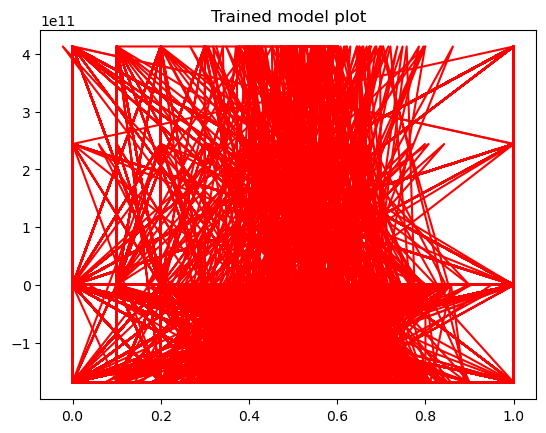

In [52]:
#plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_test,length_of_stay_predict,color='red')
plt.title("Trained model plot")
plt.plot

In [53]:
Y_train.shape

(8799, 1)

In [54]:
# # Calculate Mean Squared Error
mse = mean_squared_error(Y_test, length_of_stay_predict)
print(f"Mean Squared Error: {mse}")

# Calculate R^2 score
r2 = bed_occupied_model.score(X_test, Y_test)
print(f"R^2 Score: {r2}")

# Get the coefficients
#coefficients = pd.Series(bed_occupied_model.coef_, index=X.columns)
#print(coefficients)

Mean Squared Error: 8.943575427968066e+21
R^2 Score: -7.900582480352022e+20


In [55]:
print("Train accuracy:", round(bed_occupied_model.score(X_train, Y_train)*100,2), "%")
print("Test accuracy:", round(bed_occupied_model.score(X_test, Y_test)*100,2), "%")

Train accuracy: 87.19 %
Test accuracy: -7.900582480352023e+22 %


In [56]:
# Model training  Lasso
# Initialize the Lasso regression model with a regularization parameter alpha
lasso_model = Lasso(alpha=.005)

# Fit the model to the training data
lasso_model.fit(X_train, Y_train)

# Prediction on test set
Y_pred = lasso_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R^2 score
r2 = lasso_model.score(X_test, Y_test)
print(f"R^2 Score: {r2}")

# Get the coefficients
#coefficients = pd.Series(lasso_model.coef_, index=X.columns)
#print(coefficients)


Mean Squared Error: 3.79736876209844
R^2 Score: 0.6645477487733655


In [57]:
print("Train accuracy:", round(lasso_model.score(X_train, Y_train)*100,2), "%")
print("Test accuracy:", round(lasso_model.score(X_test, Y_test)*100,2), "%")

Train accuracy: 63.73 %
Test accuracy: 66.45 %


In [58]:
# Initialize the Ridge regression model with a regularization parameter alpha
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, Y_train)

# Prediction on test set
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R^2 score
r2 = ridge_model.score(X_test, Y_test)
print(f"R^2 Score: {r2}")



Mean Squared Error: 4.35924891619345
R^2 Score: 0.6149123368818478


In [59]:
# Perform Ridge regression with varying alpha values
alphas = [0.1, 0.5, 1.0, 5.0, 10.0,0.001]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, Y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    r2 = ridge.score(X_test, Y_test)
    print(f"Alpha: {alpha} - MSE: {mse}, R^2: {r2}")
    print("Train accuracy:", round(ridge.score(X_train, Y_train)*100,2), "%")
    print("Test accuracy:", round(ridge.score(X_test, Y_test)*100,2), "%")

Alpha: 0.1 - MSE: 5.2355277781853395, R^2: 0.5375035479616337
Train accuracy: 87.05 %
Test accuracy: 53.75 %
Alpha: 0.5 - MSE: 4.678345686189081, R^2: 0.5867239420852807
Train accuracy: 85.27 %
Test accuracy: 58.67 %
Alpha: 1.0 - MSE: 4.35924891619345, R^2: 0.6149123368818478
Train accuracy: 82.7 %
Test accuracy: 61.49 %
Alpha: 5.0 - MSE: 3.903471362299563, R^2: 0.6551748491872854
Train accuracy: 72.94 %
Test accuracy: 65.52 %
Alpha: 10.0 - MSE: 3.853742856678647, R^2: 0.6595677697082448
Train accuracy: 69.28 %
Test accuracy: 65.96 %
Alpha: 0.001 - MSE: 5.469247379808903, R^2: 0.5168572079740756
Train accuracy: 87.19 %
Test accuracy: 51.69 %


In [60]:
print("Train accuracy:", round(ridge.score(X_train, Y_train)*100,2), "%")
print("Test accuracy:", round(ridge.score(X_test, Y_test)*100,2), "%")

Train accuracy: 87.19 %
Test accuracy: 51.69 %


In [61]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, Y_train)
Y_pred = dt_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")


# Calculate R^2 score
r2 = dt_reg.score(X_test, Y_test)
print(f"R^2 Score (test data): {r2}")

r2 = dt_reg.score(X_train, Y_train)
print(f"R^2 score (train data): {r2}")


print("Train accuracy:", round(dt_reg.score(X_train, Y_train)*100,2), "%")
print("Test accuracy:", round(dt_reg.score(X_test, Y_test)*100,2), "%")

Mean Squared Error: 2.178181818181818
R^2 Score (test data): 0.8075836084757172
R^2 score (train data): 1.0
Train accuracy: 100.0 %
Test accuracy: 80.76 %


In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
Y_pred = rf_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")


# Calculate R^2 score
r2 = rf_reg.score(X_test, Y_test)
print(f"R^2 Score (test data): {r2}")

r2 = rf_reg.score(X_train, Y_train)
print(f"R^2 score (train data): {r2}")

print("Train accuracy:", round(rf_reg.score(X_train, Y_train)*100,2), "%")
print("Test accuracy:", round(rf_reg.score(X_test, Y_test)*100,2), "%")

Mean Squared Error: 1.9400447272727277
R^2 Score (test data): 0.8286201809685799
R^2 score (train data): 0.9773141282512071
Train accuracy: 97.73 %
Test accuracy: 82.86 %


In [63]:
# Dataframe to compare actual and predicted values
result_df = pd.DataFrame({'Actual': Y_test['LengthOfStay'], 'Predicted': Y_pred})
result_df.head(15)

,Actual,Predicted
2914,1,1.00
6038,6,6.01
10081,5,5.09
7273,4,4.13
531,1,1.02
2206,1,1.00
9259,11,10.25
7952,2,1.99
7378,3,3.01
5899,4,3.97


### Model Building and Code Quality
 
The data that was split into train and test were used to train the models.
 
The algorithms that were used were:
 
1.  Linear Regression
 
The train accuracy for the algorithm was **87.19%**
 
The test accuracy for the algorithm was **-2.488%**
 
2.  Lasso Regression
 
The train accuracy for the algorithm was **63.73%**
 
The test accuracy for the algorithm was **66.45%**
 
3.  Ridge Regression
 
Before finetuning with an alpha value of *1.0*:-
 
The train accuracy for the algorithm was **82.7%**
 
The test accuracy for the algorithm was **61.49%**
 
With fine tuning the results were as follows:-
 
Alpha: *0.1* -
 
Train accuracy: **87.05 %**
 
Test accuracy: **53.75 %**
 
Alpha: *0.5* –
 
Train accuracy: **85.27 %**
 
Test accuracy: **58.67 %**
 
Alpha: *1.0* -
 
Train accuracy: **82.7 %**
 
Test accuracy: **61.49 %**
 
Alpha: *5.0* -
 
Train accuracy: **72.94 %**
 
Test accuracy: **65.52 %**
 
Alpha: *10.0* –
 
Train accuracy: **69.28 %**
 
Test accuracy: **65.96 %**
 
Alpha: *0.001* -
 
Train accuracy: **87.19 %**
 
Test accuracy: **51.69 %**
 
The optimal value of the alpha for ridge can be selected as 5 or 10 as they gave almost closer train and test accuracy.
 
4.  Decision Tree Regression
 
The train accuracy for the algorithm was **100%**
 
The test accuracy for the algorithm was **80.61%**
 
This model has an issue of overfitting.
 
5.  Random Forest Regression
 
The train accuracy for the algorithm was **97.71%**
 
The test accuracy for the algorithm was **82.96%**
 
Even if the training accuracy was high the model gave a reasonable test accuracy.
 
*Hence the model with best results were given by Random Forest Regressor*

#### Fine Tuning

In summary, we fine-tuned the ABG outliers by replacing their values of -1.01 with the mode value. Subsequently, we executed the model and obtained the following results:

**Linear Regression**
Mean Squared Error: 1.5145118527062241e+21 
R^2 Score: -1.337890635143308e+20
Train accuracy: 63.65 % 
Test accuracy: 66.47 %

**Lasso**
Mean Squared Error: 3.7958567479734056 
R^2 Score: 0.6646813171924224
Train accuracy: 63.65 % 
Test accuracy: 66.47 %

**Ridge**
Mean Squared Error: 4.356250451763164 
R^2 Score: 0.6151772154613003
Train accuracy: 87.15 % 
Test accuracy: 51.72 %

**Decision Tree**
Mean Squared Error: 2.1722727272727274 
R^2 Score (test data): 0.8081056061989675 
R^2 score (train data): 1.0 
Train accuracy: 100.0 % 
Test accuracy: 80.81 %

**Random Forest**
Mean Squared Error: 1.9339399545454548
R^2 Score (test data): 0.829159464847204
R^2 score (train data): 0.9769824373440749 
Train accuracy: 97.7 % 
Test accuracy: 82.92 %

After comparing this data with the final version, we observed a change of +0.04.